In [52]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

## Buoc 1

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [29]:
df = pd.DataFrame(X, columns=iris.feature_names)
print("Thống kê đặc trưng của Iris dataset:")
print(df.describe())
print("\nPhân bố nhãn gốc:")
print(pd.Series(y).value_counts())

Thống kê đặc trưng của Iris dataset:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Phân bố nhãn gốc:
0    50
1    50
2    50
Name: count, dtype: int64


In [ ]:
# Gán nhãn: Setosa -> Positive (1), Versicolor/Virginica -> Negative (-1)
y_binary = np.where(y == 0, 1, -1)

In [ ]:
a = 1

test_indices = []
train_indices = []
for i in range(3):
    start = i * 50
    test_idx = np.arange(start, start + 50)[a-1:a+4] 
    train_idx = np.setdiff1d(np.arange(start, start + 50), test_idx)
    test_indices.extend(test_idx)
    train_indices.extend(train_idx)

X_train = X[train_indices]
y_train = y_binary[train_indices]
X_test = X[test_indices]
y_test = y_binary[test_indices]

In [17]:
print(f"Mẫu test đại diện (số thứ tự {a} đến {a+4} của setosa):")
test_samples = pd.DataFrame(X_test[:5], columns=iris.feature_names)
test_samples.index = range(a, a+5)  # Số thứ tự từ a
print(test_samples)
print("Nhãn test:", y_test[:5])


Mẫu test đại diện (số thứ tự 1 đến 5 của setosa):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
1                5.1               3.5                1.4               0.2
2                4.9               3.0                1.4               0.2
3                4.7               3.2                1.3               0.2
4                4.6               3.1                1.5               0.2
5                5.0               3.6                1.4               0.2
Nhãn test: [1 1 1 1 1]


## Buoc 2

In [19]:
X_train_2d = np.column_stack((X_train[:, 0] * X_train[:, 1], X_train[:, 2] * X_train[:, 3]))
X_test_2d = np.column_stack((X_test[:, 0] * X_test[:, 1], X_test[:, 2] * X_test[:, 3]))

In [20]:
scaler = MinMaxScaler()
X_train_2d_scaled = scaler.fit_transform(X_train_2d)
X_test_2d_scaled = scaler.transform(X_test_2d)

In [22]:
print(f"Đặc trưng 2D trước chuẩn hóa (mẫu test {a} đến {a+4} của setosa):")
print(pd.DataFrame(X_test_2d[:5], columns=['Sepal Area', 'Petal Area'], index=range(a, a+5)))
print(f"\nĐặc trưng 2D sau chuẩn hóa (mẫu test {a} đến {a+4} của setosa):")
print(pd.DataFrame(X_test_2d_scaled[:5], columns=['Sepal Area', 'Petal Area'], index=range(a, a+5)))

Đặc trưng 2D trước chuẩn hóa (mẫu test 1 đến 5 của setosa):
   Sepal Area  Petal Area
1       17.85        0.28
2       14.70        0.28
3       15.04        0.26
4       14.26        0.30
5       18.00        0.28

Đặc trưng 2D sau chuẩn hóa (mẫu test 1 đến 5 của setosa):
   Sepal Area  Petal Area
1    0.392108    0.010787
2    0.234765    0.010787
3    0.251748    0.009518
4    0.212787    0.012056
5    0.399600    0.010787


In [67]:
print(f"Đặc trưng 2D trước chuẩn hóa (mẫu train 6 đến 10 của setosa):")
print(pd.DataFrame(X_train_2d[:5], columns=['Sepal Area', 'Petal Area'], index=range(6,11)))
print(f"\nĐặc trưng 2D sau chuẩn hóa (mẫu train 6 đến 10 của setosa):")
print(pd.DataFrame(X_train_2d_scaled[:5], columns=['Sepal Area', 'Petal Area'], index=range(6, 11)))

Đặc trưng 2D trước chuẩn hóa (mẫu train 6 đến 10 của setosa):
    Sepal Area  Petal Area
6        21.06        0.68
7        15.64        0.42
8        17.00        0.30
9        12.76        0.28
10       15.19        0.15

Đặc trưng 2D sau chuẩn hóa (mẫu train 6 đến 10 của setosa):
    Sepal Area  Petal Area
6     0.552448    0.036168
7     0.281718    0.019670
8     0.349650    0.012056
9     0.137862    0.010787
10    0.259241    0.002538


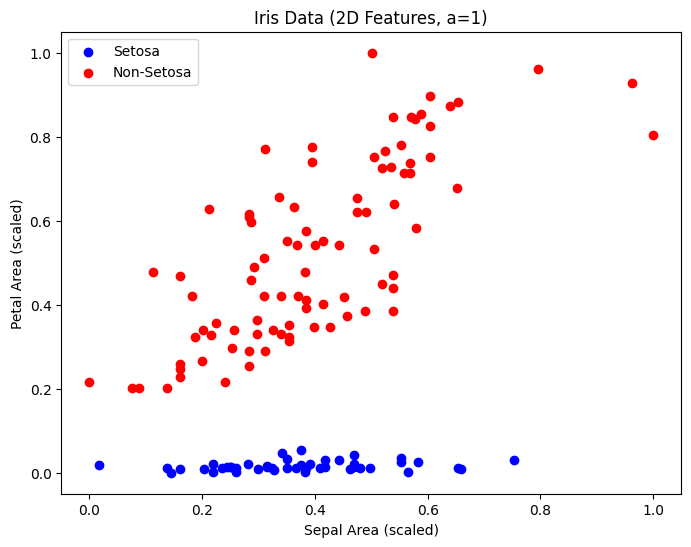

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_2d_scaled[y_train == 1, 0], X_train_2d_scaled[y_train == 1, 1], c='blue', label='Setosa', marker='o')
plt.scatter(X_train_2d_scaled[y_train == -1, 0], X_train_2d_scaled[y_train == -1, 1], c='red', label='Non-Setosa', marker='o')
plt.xlabel('Sepal Area (scaled)')
plt.ylabel('Petal Area (scaled)')
plt.legend()
plt.title(f'Iris Data (2D Features, a={a})')
plt.show()

## Buoc 3


In [44]:
svm = SVC(C=1, kernel='linear')
svm.fit(X_train_2d_scaled, y_train)

print("SVM với C=1:")
print("Số support vectors:", len(svm.support_vectors_))
print("Support vectors:")
support_vectors_df = pd.DataFrame(svm.support_vectors_[:7], columns=['Sepal Area', 'Petal Area'], index=range(1, 8))
print(support_vectors_df)

SVM với C=1:
Số support vectors: 46
Support vectors:
   Sepal Area  Petal Area
1    0.087912    0.202411
2    0.000000    0.215102
3    0.159840    0.246827
4    0.311688    0.289975
5    0.282717    0.253173
6    0.199800    0.265228
7    0.353646    0.322970


In [43]:
svm_article = SVC(C=0.01, kernel='linear')
svm_article.fit(X_train_2d_scaled, y_train)

print("\nSVM với C=0.01 (theo bài báo):")
print("Số support vectors:", len(svm_article.support_vectors_))
print("Support vectors:")
support_vectors_article_df = pd.DataFrame(svm_article.support_vectors_[:7], columns=['Sepal Area', 'Petal Area'], index=range(1, 8))
print(support_vectors_article_df)


SVM với C=0.01 (theo bài báo):
Số support vectors: 90
Support vectors:
   Sepal Area  Petal Area
1    0.297702    0.364213
2    0.538961    0.470178
3    0.087912    0.202411
4    0.456543    0.372462
5    0.201798    0.339467
6    0.000000    0.215102
7    0.384615    0.392766


## Buoc 4

In [37]:
w = svm.coef_[0]
b = svm.intercept_[0]
print(f"Phương trình hyperplane (C=1): {w[0]:.2f} * x1 + {w[1]:.2f} * x2 + {b:.2f} = 0")

Phương trình hyperplane (C=1): 0.74 * x1 + -5.95 * x2 + 0.83 = 0


C:\Users\OS\AppData\Local\Temp\ipykernel_26376\129216066.py:13: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(x1, x2_positive, 'k--', label='Margin (+1)', linestyle='dashed')
C:\Users\OS\AppData\Local\Temp\ipykernel_26376\129216066.py:14: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(x1, x2_negative, 'k--', label='Margin (-1)', linestyle='dashed')


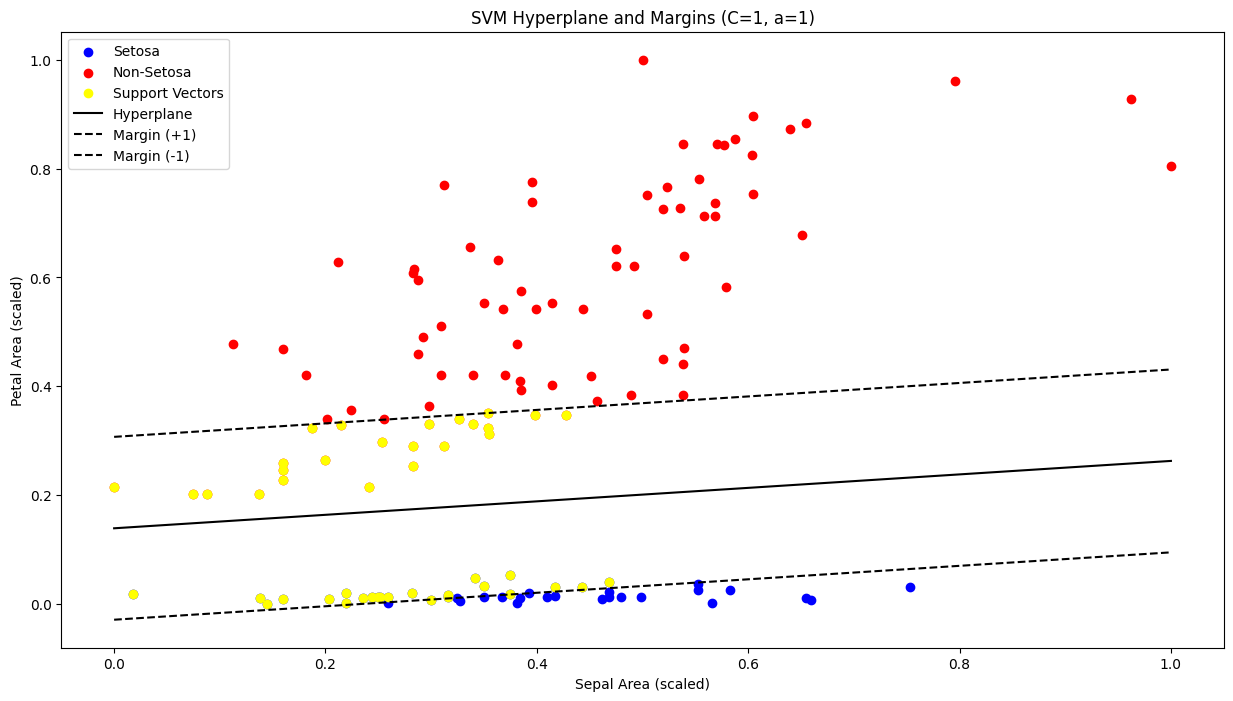

In [58]:
plt.figure(figsize=(15, 8))
plt.scatter(X_train_2d_scaled[y_train == 1, 0], X_train_2d_scaled[y_train == 1, 1], c='blue', label='Setosa', marker='o')
plt.scatter(X_train_2d_scaled[y_train == -1, 0], X_train_2d_scaled[y_train == -1, 1], c='red', label='Non-Setosa', marker='o')
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], c='yellow', label='Support Vectors', marker='o')

x1 = np.linspace(0, 1, 100)
x2 = -(w[0] * x1 + b) / w[1]
plt.plot(x1, x2, 'k-', label='Hyperplane')

margin = 1 / np.sqrt(np.sum(w ** 2))  # Khoảng cách margin
x2_positive = -(w[0] * x1 + b + 1) / w[1]  # Margin cho lớp +1
x2_negative = -(w[0] * x1 + b - 1) / w[1]  # Margin cho lớp -1
plt.plot(x1, x2_positive, 'k--', label='Margin (+1)', linestyle='dashed')
plt.plot(x1, x2_negative, 'k--', label='Margin (-1)', linestyle='dashed')

plt.xlabel('Sepal Area (scaled)')
plt.ylabel('Petal Area (scaled)')
plt.legend()
plt.title(f'SVM Hyperplane and Margins (C=1, a={a})')
plt.show()

## Buoc 5


Kết quả phân lớp (mẫu 1 đến 5):
Mẫu 1 (setosa): True=1, Pred=1, Đúng
Mẫu 2 (setosa): True=1, Pred=1, Đúng
Mẫu 3 (setosa): True=1, Pred=1, Đúng
Mẫu 4 (setosa): True=1, Pred=1, Đúng
Mẫu 5 (setosa): True=1, Pred=1, Đúng
Mẫu 1 (non-setosa): True=-1, Pred=-1, Đúng
Mẫu 2 (non-setosa): True=-1, Pred=-1, Đúng
Mẫu 3 (non-setosa): True=-1, Pred=-1, Đúng
Mẫu 4 (non-setosa): True=-1, Pred=-1, Đúng
Mẫu 5 (non-setosa): True=-1, Pred=-1, Đúng
Mẫu 1 (non-setosa): True=-1, Pred=-1, Đúng
Mẫu 2 (non-setosa): True=-1, Pred=-1, Đúng
Mẫu 3 (non-setosa): True=-1, Pred=-1, Đúng
Mẫu 4 (non-setosa): True=-1, Pred=-1, Đúng
Mẫu 5 (non-setosa): True=-1, Pred=-1, Đúng


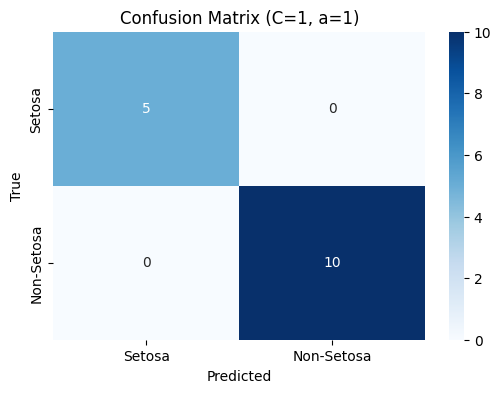

Precision: 1.00
Recall: 1.00
Accuracy: 1.00


In [62]:
y_pred = svm.predict(X_test_2d_scaled)

print(f"Kết quả phân lớp (mẫu 1 đến 5):")
for i in range(15):  # 5 setosa + 5 versicolor + 5 virginica
    species = 'setosa' if i < 5 else 'non-setosa' if i < 10 else 'non-setosa'
    label = 'setosa' if i < 5 else 'non-setosa'
    print(f"Mẫu {i%5+1} ({species}): True={y_test[i]}, Pred={y_pred[i]}, {'Đúng' if y_test[i] == y_pred[i] else 'Sai'}")

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred, labels=[1, -1])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Non-Setosa'], yticklabels=['Setosa', 'Non-Setosa'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix (C=1, a={a})')
plt.show()

# Tính số liệu
print(f"Precision: {precision_score(y_test, y_pred, pos_label=1):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, pos_label=1):.2f}")
print(f"Accuracy: {(y_test == y_pred).mean():.2f}")